<a href="https://colab.research.google.com/github/xiiang0529/Trading/blob/main/Trading_Strategy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from pylab import mpl, plt
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%config InlineBackend.figure_format = 'svg'

SyntaxError: ignored

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving tr_eikon_eod_data.csv to tr_eikon_eod_data.csv


In [ ]:
df=pd.read_csv('tr_eikon_eod_data.csv')

In [ ]:
df.set_index('Date', inplace=True)

In [ ]:
df.head()

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.4323,1096.35,NaN,NaN
2010-01-04,30.572827,30.950,20.88,133.90,173.08,113.33,1132.99,20.04,1.4411,1120.00,47.71,109.80
2010-01-05,30.625684,30.960,20.87,134.69,176.14,113.63,1136.52,19.35,1.4368,1118.65,48.17,109.70
2010-01-06,30.138541,30.770,20.80,132.25,174.26,113.71,1137.14,19.16,1.4412,1138.50,49.34,111.51
2010-01-07,30.082827,30.452,20.60,130.00,177.67,114.19,1141.69,19.06,1.4318,1131.90,49.10,110.82


In [ ]:
df.tail()

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2018-06-25,182.17,98.39,50.71,1663.15,221.54,271.00,2717.07,17.33,1.1702,1265.00,22.01,119.89
2018-06-26,184.43,99.08,49.67,1691.09,221.58,271.60,2723.06,15.92,1.1645,1258.64,21.95,119.26
2018-06-27,184.16,97.54,48.76,1660.51,220.18,269.35,2699.63,17.91,1.1552,1251.62,21.81,118.58
2018-06-28,185.50,98.63,49.25,1701.45,223.42,270.89,2716.31,16.85,1.1567,1247.88,21.93,118.22
2018-06-29,185.11,98.61,49.71,1699.80,220.57,271.28,2718.37,16.09,1.1683,1252.25,22.31,118.65


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 2010-01-01 to 2018-06-29
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL.O  2138 non-null   float64
 1   MSFT.O  2138 non-null   float64
 2   INTC.O  2138 non-null   float64
 3   AMZN.O  2138 non-null   float64
 4   GS.N    2138 non-null   float64
 5   SPY     2138 non-null   float64
 6   .SPX    2138 non-null   float64
 7   .VIX    2138 non-null   float64
 8   EUR=    2216 non-null   float64
 9   XAU=    2211 non-null   float64
 10  GDX     2138 non-null   float64
 11  GLD     2138 non-null   float64
dtypes: float64(12)
memory usage: 225.1+ KB


In [ ]:
df.describe().round(2)

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
count,2138.00,2138.00,2138.00,2138.00,2138.00,2138.00,2138.00,2138.00,2216.00,2211.00,2138.00,2138.00
mean,93.46,44.56,29.36,480.46,170.22,180.32,1802.71,17.03,1.25,1349.01,33.57,130.09
std,40.55,19.53,8.17,372.31,42.48,48.19,483.34,5.88,0.11,188.75,15.17,18.78
min,27.44,23.01,17.66,108.61,87.70,102.20,1022.58,9.14,1.04,1051.36,12.47,100.50
25%,60.29,28.57,22.51,213.60,146.61,133.99,1338.57,13.07,1.13,1221.53,22.14,117.40
50%,90.55,39.66,27.33,322.06,164.43,186.32,1863.08,15.58,1.27,1292.61,25.62,124.00
75%,117.24,54.37,34.71,698.85,192.13,210.99,2108.94,19.07,1.35,1428.24,48.34,139.00
max,193.98,102.49,57.08,1750.08,273.38,286.58,2872.87,48.00,1.48,1898.99,66.63,184.59


In [ ]:
df.mean()

AAPL.O      93.455973
MSFT.O      44.561115
INTC.O      29.364192
AMZN.O     480.461251
GS.N       170.216221
SPY        180.323029
.SPX      1802.713106
.VIX        17.027133
EUR=         1.248587
XAU=      1349.014130
GDX         33.566525
GLD        130.086590
dtype: float64

In [ ]:
symbol='AAPL.O'

In [ ]:
data=(pd.DataFrame(df[symbol]).dropna())

In [ ]:
SMA1=42
SMA2=252

In [ ]:
data['SMA1']=data[symbol].rolling(SMA1).mean()
data['SMA2']=data[symbol].rolling(SMA2).mean()

<Axes: xlabel='Date'>

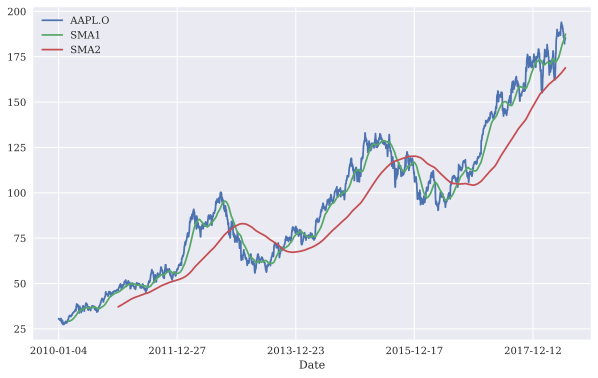

In [ ]:
data.plot(figsize=(10, 6),'1y')

In [ ]:
data.dropna(inplace=True)

In [ ]:
data['Position']=np.where(data['SMA1']>data['SMA2'], 1, -1)

In [ ]:
data.tail()

,AAPL.O,SMA1,SMA2,Position
Date,,,,
2018-06-25,182.17,185.606190,168.265556,1
2018-06-26,184.43,186.087381,168.418770,1
2018-06-27,184.16,186.607381,168.579206,1
2018-06-28,185.50,187.089286,168.736627,1
2018-06-29,185.11,187.470476,168.901032,1


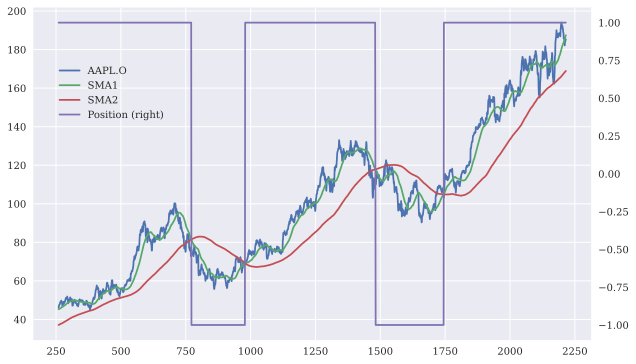

In [ ]:
ax=data.plot(secondary_y='Position', figsize=(10,6))
ax.get_legend().set_bbox_to_anchor((0.25, 0.85))

Vectorized Backtesting

In [ ]:
data['Returns']=np.log(data[symbol]/data[symbol].shift(1))

In [ ]:
data['Strategy']=data['Position'].shift(1)*data['Returns']

In [ ]:
data.round(4).head()

,AAPL.O,SMA1,SMA2,Position,Returns,Strategy
261,47.0814,45.3497,37.1862,1,0.0215,0.0215
262,47.3271,45.4126,37.2525,1,0.0052,0.0052
263,47.7142,45.4661,37.3223,1,0.0081,0.0081
264,47.6757,45.5226,37.3921,1,-0.0008,-0.0008
265,48.0171,45.5821,37.4625,1,0.0071,0.0071


In [ ]:
data.dropna(inplace=True)

In [ ]:
np.exp(data[['Returns', 'Strategy']].sum())

Returns     4.017148
Strategy    5.811299
dtype: float64

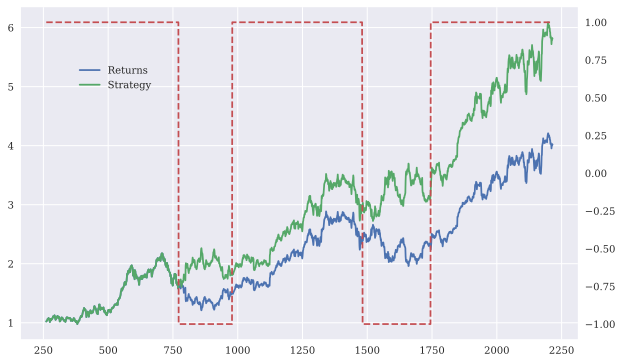

In [ ]:
ax=data[['Returns', 'Strategy']].cumsum().apply(np.exp).plot(figsize=(10, 6))
data['Position'].plot(ax=ax, secondary_y='Position', style='--')
ax.get_legend().set_bbox_to_anchor((0.25, 0.85))

Optimization

In [ ]:
from itertools import product

In [ ]:
sma1=range(20, 61, 4)
sma2=range(180, 281, 10)

In [ ]:
results = pd.DataFrame()
for SMA1, SMA2 in product(sma1, sma2):
  data= pd.DataFrame(df[symbol])
  data.dropna(inplace=True)
  data['Returns'] = np.log(data[symbol] / data[symbol].shift(1))
  data['SMA1'] = data[symbol].rolling(SMA1).mean()
  data['SMA2'] = data[symbol].rolling(SMA2).mean()
  data.dropna(inplace=True)
  data['Position'] = np.where(data['SMA1'] >data['SMA2'], 1, -1)
  data['Strategy'] = data['Position'].shift (1) * data['Returns']
  data.dropna(inplace=True)
  perf = np.exp(data[['Returns', 'Strategy']].sum())
  results=results.append(pd.DataFrame(
      {'SMA1': SMA1, 'SMA2': SMA2,
       'MARKET': perf['Returns'],
       'STRATEGY': perf['Strategy'],
       'OUT': perf['Strategy'] - perf['Returns']},
      index=[0]), ignore_index=True)

<ipython-input-61-66dda1bcabfb>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results=results.append(pd.DataFrame(
<ipython-input-61-66dda1bcabfb>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results=results.append(pd.DataFrame(
<ipython-input-61-66dda1bcabfb>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results=results.append(pd.DataFrame(
<ipython-input-61-66dda1bcabfb>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results=results.append(pd.DataFrame(
<ipython-input-61-66dda1bcabfb>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

In [ ]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SMA1      121 non-null    int64  
 1   SMA2      121 non-null    int64  
 2   MARKET    121 non-null    float64
 3   STRATEGY  121 non-null    float64
 4   OUT       121 non-null    float64
dtypes: float64(3), int64(2)
memory usage: 4.9 KB


In [ ]:
results.sort_values('OUT', ascending=False).head(7)

,SMA1,SMA2,MARKET,STRATEGY,OUT
56,40,190,4.650342,7.175173,2.524831
39,32,240,4.045619,6.558690,2.513071
59,40,220,4.220272,6.544266,2.323994
46,36,200,4.074753,6.389627,2.314874
55,40,180,4.574979,6.857989,2.283010
70,44,220,4.220272,6.469843,2.249571
101,56,200,4.074753,6.319524,2.244772


Random Walk Hypothesis

In [ ]:
symbol='.SPX'

In [ ]:
data=pd.DataFrame(df[symbol])

NameError: ignored

In [ ]:
lags=5
cols=[]
for lag in range(1, lags + 1):
  col='log_{}'.format(lag)
  data[col]=data[symbol].shift(lag)
  cols.append(col)

In [ ]:
data.head(7)

,.SPX,log_1,log_2,log_3,log_4,log_5
Date,,,,,,
2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-04,1132.99,NaN,NaN,NaN,NaN,NaN
2010-01-05,1136.52,1132.99,NaN,NaN,NaN,NaN
2010-01-06,1137.14,1136.52,1132.99,NaN,NaN,NaN
2010-01-07,1141.69,1137.14,1136.52,1132.99,NaN,NaN
2010-01-08,1144.98,1141.69,1137.14,1136.52,1132.99,NaN
2010-01-11,1146.98,1144.98,1141.69,1137.14,1136.52,1132.99


In [ ]:
data.dropna(inplace=True)

In [ ]:
reg=np.linalg.lstsq(data[cols], data[symbol], rcond=-1)[0]

In [ ]:
reg.round(3)

array([0.966, 0.005, 0.025, 0.   , 0.003])

<BarContainer object of 5 artists>

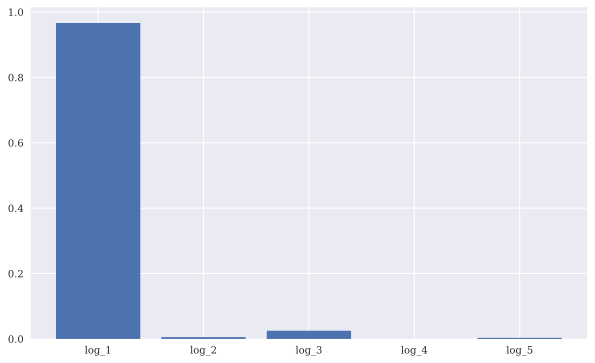

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(cols, reg)

In [ ]:
data['Prediction']=np.dot(data[cols], reg)

<Axes: xlabel='Date'>

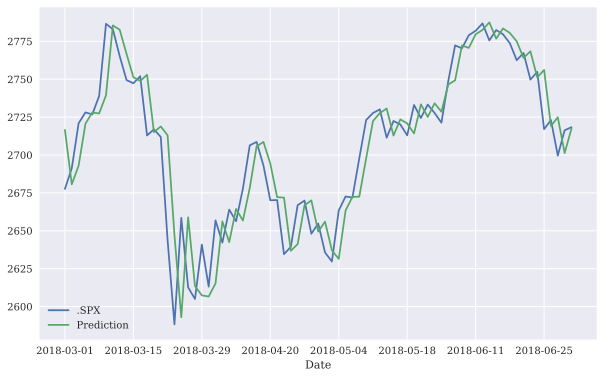

In [ ]:
data[[symbol, 'Prediction']].iloc[-75:].plot(figsize=(10, 6))